# An analysis of the individual voters in the 2016 USA Presidential Election

DISCLAIMER: I was not able to verify the complete validity of this data, so it may be biased towards those who answered the survey.

Furthermore, nothing here is a novel discovery, just a set of interesting observations.

1. The motivation of this analysis is to understand the demographics of individual voters in the 2016 USA Presidential Election. This dataset was chosen because it has several interesting features that can be analyzed.
<br>source: https://vincentarelbundock.github.io/Rdatasets/doc/stevedata/TV16.html Cooperative Congressional Election Study (CCES)


2. The data is mostly clean.  There are some missing values for who was voted for, so I decided to drop those rows.  I left other nulls as they do not grossly affect the analysis.

3. I have included more than 4 plots.  Each plot has a clear purpose and takeaway.  The plots demonstrate interesting aspects of the data.

4. See insights throughout the analysis.

## Data Import and Cleanup

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import Image

# Read the data
voter_data = pd.read_csv('data/trum.csv')

In [2]:
# drop rows where votetrump is null, keeping other nans since they wont impact the analysis much
voter_data = voter_data.dropna(subset=['votetrump'])

In [3]:
# reset the index (also dropping uid column which is not needed)
voter_data = voter_data.drop(['uid'], axis=1)
voter_data = voter_data.reset_index(drop=True)

In [4]:
voters_trump = voter_data[voter_data['votetrump'] == 1]
voters_clinton = voter_data[voter_data['votetrump'] == 0]
# ratio
len(voters_clinton) / len(voters_trump)

1.3957344708077846

In [5]:
voter_data.shape

(44932, 20)

In [6]:
voter_data.head()

,state,votetrump,age,female,collegeed,racef,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
0,New Hampshire,1.0,47,1,0,White,NaN,3.0,5.0,0.0,3.0,1.0,3.0,2.0,3.0,1.0,3.0,-0.191681,0.475294,-0.138715
1,Louisiana,1.0,22,1,0,White,6.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0,4.0,1.0,1.0,NaN,-0.185682,-0.619427
2,Colorado,0.0,34,1,1,White,7.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,-1.130175,-1.204085,-0.138715
3,Texas,1.0,54,0,0,White,3.0,5.0,6.0,1.0,4.0,5.0,7.0,2.0,5.0,2.0,2.0,1.171097,0.508762,0.204095
4,Georgia,1.0,53,0,0,White,4.0,4.0,7.0,1.0,2.0,3.0,6.0,3.0,4.0,1.0,2.0,-0.263387,0.301278,0.070166


In [7]:
voter_data.describe()

,votetrump,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
count,44932.000000,44932.000000,44932.000000,44932.000000,40212.000000,43430.000000,44320.000000,44910.000000,44912.000000,44610.000000,44028.000000,44885.000000,44880.000000,44832.000000,44846.000000,44928.000000,44931.000000,44930.000000
mean,0.417409,51.887675,0.545558,0.409552,6.661096,3.025443,3.628046,0.273191,2.797983,2.903878,4.384642,1.677621,2.651114,2.132205,2.279980,0.007330,-0.011388,-0.010587
std,0.493137,16.006674,0.497926,0.491757,3.133376,1.109896,2.199976,0.445603,1.158270,1.699801,2.349439,0.961253,1.465142,1.130224,1.234908,0.948422,0.826406,0.471285
min,0.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.584900,-1.204085,-0.619427
25%,0.000000,38.000000,0.000000,0.000000,4.000000,2.000000,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,-0.637953,-0.643632,-0.619427
50%,0.000000,54.000000,1.000000,0.000000,6.000000,3.000000,4.000000,0.000000,3.000000,2.000000,5.000000,1.000000,2.000000,2.000000,2.000000,0.060855,-0.005524,0.052228
75%,1.000000,64.000000,1.000000,1.000000,9.000000,4.000000,6.000000,1.000000,4.000000,5.000000,7.000000,2.000000,4.000000,3.000000,3.000000,0.746089,0.508762,0.271789
max,1.000000,95.000000,1.000000,1.000000,12.000000,5.000000,7.000000,1.000000,4.000000,6.000000,7.000000,5.000000,5.000000,5.000000,5.000000,1.696614,1.841226,1.386214


The features are as follows:

| Column Name  | Description                                                                                     |
|--------------|-------------------------------------------------------------------------------------------------|
| `state`      | A character vector for the state in which the respondent resides                                 |
| `votetrump`  | A numeric that equals 1 if the respondent says s/he voted for Trump in 2016                      |
| `age`        | A numeric vector for age, roughly calculated as 2016 - birthyr                                   |
| `female`     | A numeric that equals 1 if the respondent is a woman                                             |
| `collegeed`  | A numeric vector that equals 1 if the respondent says s/he has a college degree                  |
| `racef`      | A character vector for the race of the respondent                                                |
| `famincr`    | A numeric vector for the respondent's household income, ranging from 1 to 12                     |
| `ideo`       | A numeric vector for the respondent's ideology, ranging from 1 (very liberal) to 5 (very conservative) |
| `pid7na`     | A numeric vector for the respondent's partisanship, ranging from 1 to 7                          |
| `bornagain`  | A numeric vector for whether the respondent self-identifies as a born-again Christian            |
| `religimp`   | A numeric vector for the importance of religion to the respondent, ranging from 1 to 4           |
| `churchatd`  | A numeric vector for the extent of church attendance, ranging from 1 to 6                        |
| `prayerfreq` | A numeric vector for the frequency of prayer, ranging from 1 to 7                                |
| `angryracism`| A numeric vector for how angry the respondent is that racism exists, ranging from 1 to 5          |
| `whiteadv`   | A numeric vector for agreement with the statement that white people have advantages, ranging from 1 to 5  |
| `fearraces`  | A numeric vector for agreement with the statement that the respondent fears other races, ranging from 1 to 5 |
| `racerare`   | A numeric vector for agreement with the statement that racism is rare in the U.S., ranging from 1 to 5   |
| `lrelig`     | A numeric vector that serves as a latent estimate for religiosity                                |
| `lcograc`    | A numeric vector that serves as a latent estimate for cognitive racism                           |
| `lemprac`    | A numeric vector that serves as a latent estimate for empathetic racism                          |

We can now explore the relation between the features and the voting results.

Code below for assistance with the analysis

In [8]:
feature_desc_dict = {
    'state': 'State of Residence',
    'votetrump': 'Voted for Trump',
    'age': 'Age at time of vote',
    'female': 'Is a Woman',
    'collegeed': 'Has a College Education',
    'racef': 'Race of Voter',
    'famincr': 'Household Income (1 to 12)',
    'ideo': 'Ideology (1 lib to 5 con)',
    'pid7na': 'Partisanship (1 to 7)',
    'bornagain': 'Born Again Christian',
    'religimp': 'Importance of Religion (1 to 4)',
    'churchatd': 'Church Attendance (1 to 6)',
    'prayerfreq': 'Frequency of Prayer (1 to 7)',
    'angryracism': 'Angry that Racism exists (1 to 5)',
    'whiteadv': 'Agree Whites have advantages (1 to 5)',
    'fearraces': 'Fear of other Races (1 to 5)',
    'racerace': 'Agree that racism is rare in the US (1 to 5)',
    'lrelig': 'Latent Estimate of Religiosity',
    'lcograc': 'Latent Estimate of Cognitive Racism',
    'lemprac': 'Latent Estimate of Empathetic Racism',
    'avg_racism': 'Average of Cognitive and Empathetic Racism',
}

# Dictionary to map full state names to two-letter abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}


# histogram comparison function
def histo_compare(t_df, c_df, stat, title, nbins=20):
    t_df[stat].hist(bins=nbins, alpha=0.5, label='Trump', color='red')
    c_df[stat].hist(bins=nbins, alpha=0.5, label='Clinton', color='blue')
    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel(feature_desc_dict[stat])
    plt.ylabel('Frequency')
    # show the average
    plt.axvline(t_df[stat].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(c_df[stat].mean(), color='blue', linestyle='dashed', linewidth=1)


# function for trump_v_clinton pie charts
def piechart_compare(t_df, c_df, stat, title):
    labels = 'Trump', 'Clinton'
    sizes = [t_df[stat].mean(), c_df[stat].mean()]
    colors = ['red', 'blue']
    explode = (0, 0.1) # explode 1st slice
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()


def pie_percentage(percent_yes, percent_no, labels, colors, title):
    sizes = [percent_yes, percent_no]
    explode = (0, 0.1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

def choropleth_vote_data(df, feature, color_scale='tropic'):
    state_avg_data = df.groupby('state_abbrev')[feature].mean().reset_index()
    fig = px.choropleth(state_avg_data, 
                    locations='state_abbrev', 
                    locationmode="USA-states", 
                    color=feature,
                    color_continuous_scale=color_scale,
                    scope="usa",
                    labels={feature: feature_desc_dict[feature]},
                    title='Average {} by U.S. State'.format(feature_desc_dict[feature]))

    fig.update_layout(width=1000, height=600, dragmode=False)

    # show average on legend
    fig.add_annotation(text='Average: {:.2f}'.format(state_avg_data[feature].mean()), x=0.5, y=-0.1, showarrow=False, yshift=10)

    # save as png
    fig.write_image('../img/choropleth_{}.png'.format(feature))

    # fig.show()

voter_data['state_abbrev'] = voter_data['state'].map(state_abbrev)
voter_data['avg_racism'] = (voter_data['lcograc'] + voter_data['lemprac']) / 2
# correlation matrix, ignore state_abbrev and state
corr = voter_data.drop(['state_abbrev', 'state', 'racef'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,votetrump,age,female,collegeed,famincr,ideo,pid7na,bornagain,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac,avg_racism
votetrump,1.000000,0.184245,-0.083383,-0.148235,0.000199,0.606259,0.725064,0.229583,0.283912,0.206353,0.245038,0.402290,0.621102,0.116723,0.425202,0.284777,0.584180,0.342119,0.587861
age,0.184245,1.000000,-0.103753,-0.148028,-0.033995,0.180310,0.119883,0.023539,0.135981,0.057779,0.158883,0.097561,0.143682,0.034021,0.019096,0.141173,0.086982,0.087371,0.103207
female,-0.083383,-0.103753,1.000000,-0.078838,-0.167920,-0.077010,-0.080537,0.043492,0.096512,0.031227,0.149445,-0.152191,-0.068963,-0.009951,-0.130972,0.101554,-0.115926,-0.100028,-0.130463
collegeed,-0.148235,-0.148028,-0.078838,1.000000,0.347783,-0.133413,-0.093793,-0.105742,-0.097616,0.034600,-0.088573,-0.034737,-0.175281,-0.055089,-0.045801,-0.076789,-0.123367,-0.061074,-0.119301
famincr,0.000199,-0.033995,-0.167920,0.347783,1.000000,-0.004805,0.035677,-0.108169,-0.084798,0.019418,-0.093834,0.035490,-0.038516,-0.038032,0.035875,-0.076363,-0.000451,0.000802,-0.000005
ideo,0.606259,0.180310,-0.077010,-0.133413,-0.004805,1.000000,0.665230,0.321649,0.402754,0.339664,0.349586,0.355933,0.539715,0.135583,0.416658,0.420340,0.550662,0.328901,0.556395
pid7na,0.725064,0.119883,-0.080537,-0.093793,0.035677,0.665230,1.000000,0.215752,0.257421,0.208613,0.224211,0.361262,0.563761,0.092791,0.388113,0.265890,0.540808,0.307729,0.540148
bornagain,0.229583,0.023539,0.043492,-0.105742,-0.108169,0.321649,0.215752,1.000000,0.495949,0.473106,0.466520,0.060686,0.172973,0.067246,0.148905,0.534871,0.181204,0.083788,0.172750
religimp,0.283912,0.135981,0.096512,-0.097616,-0.084798,0.402754,0.257421,0.495949,1.000000,0.712647,0.777780,0.073551,0.239156,0.095083,0.184184,0.949120,0.243892,0.112193,0.232253
churchatd,0.206353,0.057779,0.031227,0.034600,0.019418,0.339664,0.208613,0.473106,0.712647,1.000000,0.633241,0.052719,0.148339,0.062789,0.156665,0.824504,0.178421,0.078347,0.168278


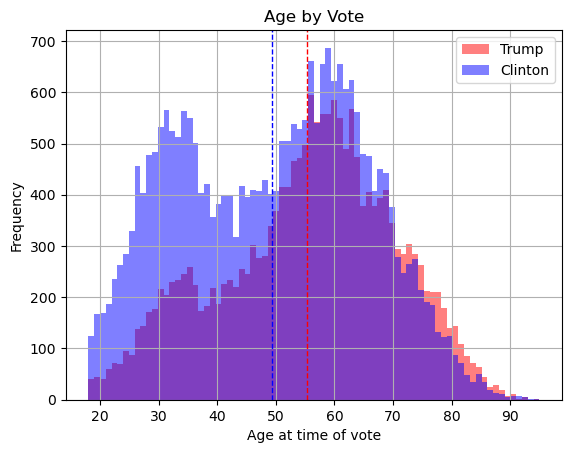

In [10]:
histo_compare(voters_trump, voters_clinton, 'age', 'Age by Vote', nbins=1 + voters_trump['age'].max() - voters_clinton['age'].min())

The age distribution above highlights the overall age difference of Trump voters vs Clinton voters.  It illustrates that, on average, voters for Trump were older than their Clinton voting counterparts, although not by much.

In [11]:
# percentages of non white voters
non_white_trump = voters_trump[voters_trump['racef'] != 'White']
non_white_clinton = voters_clinton[voters_clinton['racef'] != 'White']
trump_nonwhite_vote_percent = len(non_white_trump) / len(voters_trump)
clinton_nonwhite_vote_percent = len(non_white_clinton) / len(voters_clinton)
trump_white_vote_percent = 1 - trump_nonwhite_vote_percent
clinton_white_vote_percent = 1 - clinton_nonwhite_vote_percent

# percentage religious more than average
religious_trump = voters_trump[voters_trump['lrelig'] > 0]
religious_clinton = voters_clinton[voters_clinton['lrelig'] > 0]
trump_religious_vote_percent = len(religious_trump) / len(voters_trump)
clinton_religious_vote_percent = len(religious_clinton) / len(voters_clinton)
trump_nonreligious_vote_percent = 1 - trump_religious_vote_percent
clinton_nonreligious_vote_percent = 1 - clinton_religious_vote_percent

# percentage college educated
college_trump = voters_trump[voters_trump['collegeed'] == 1]
college_clinton = voters_clinton[voters_clinton['collegeed'] == 1]
trump_college_yes = len(college_trump) / len(voters_trump)
clinton_college_yes = len(college_clinton) / len(voters_clinton)
trump_college_no = 1 - trump_college_yes
clinton_college_no = 1 - clinton_college_yes

trump_colors = ['red', 'gray']
clinton_colors = ['blue', 'gray']
labels = 'Non-White', 'White'

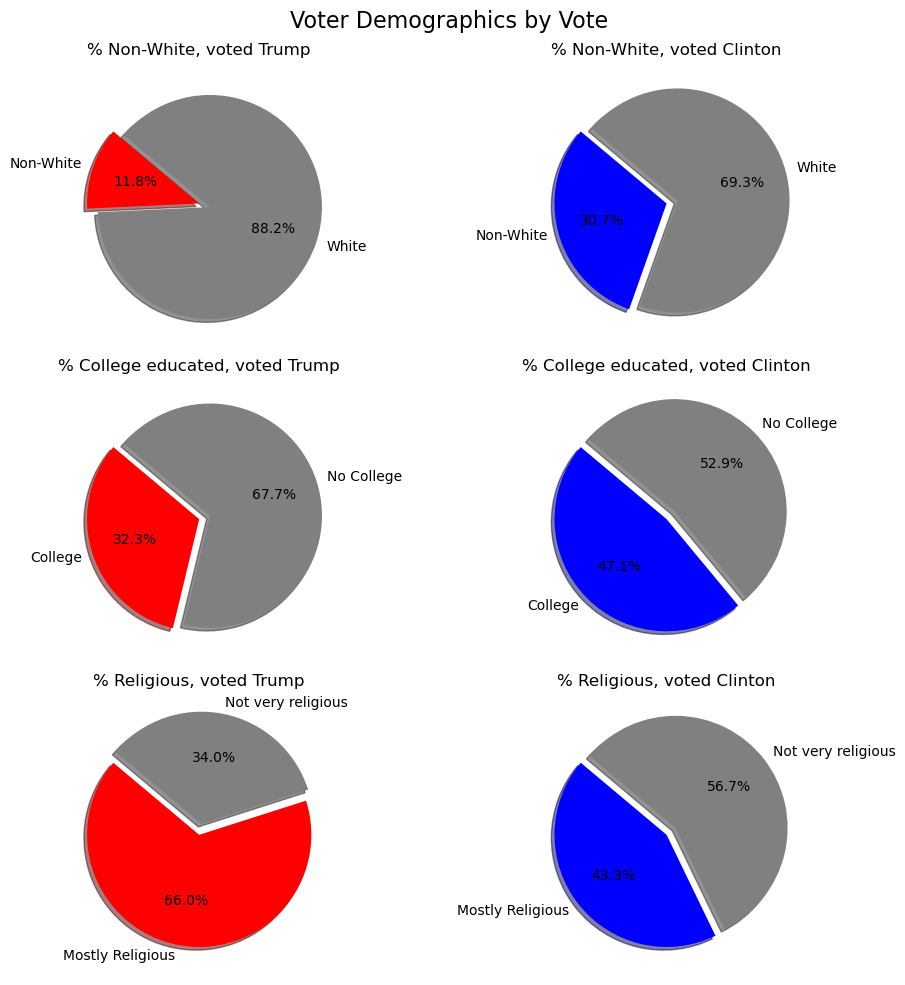

In [12]:
# pie chart grid
fig = plt.figure(figsize=(10,10))
fig.suptitle('Voter Demographics by Vote', fontsize=16)
explode = (0, 0.1) # explode 1st slice
# row 1
ax1 = fig.add_subplot(3,2,1)
ax1.pie([trump_nonwhite_vote_percent, trump_white_vote_percent], labels=['Non-White', 'White'], colors=trump_colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
ax1.set_title('% Non-White, voted Trump')
ax2 = fig.add_subplot(3,2,2)
ax2.pie([clinton_nonwhite_vote_percent, clinton_white_vote_percent], labels=['Non-White', 'White'], colors=clinton_colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
ax2.set_title('% Non-White, voted Clinton')
# row 2
ax3 = fig.add_subplot(3,2,3)
ax3.pie([trump_college_yes, trump_college_no], labels=['College', 'No College'], colors=trump_colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
ax3.set_title('% College educated, voted Trump')
ax4 = fig.add_subplot(3,2,4)
ax4.pie([clinton_college_yes, clinton_college_no], labels=['College', 'No College'], colors=clinton_colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
ax4.set_title('% College educated, voted Clinton')
# row 3
ax5 = fig.add_subplot(3,2,5)
ax5.pie([trump_religious_vote_percent, trump_nonreligious_vote_percent], labels=['Mostly Religious', 'Not very religious'], colors=trump_colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
ax5.set_title('% Religious, voted Trump')
ax6 = fig.add_subplot(3,2,6)
ax6.pie([clinton_religious_vote_percent, clinton_nonreligious_vote_percent], labels=['Mostly Religious', 'Not very religious'], colors=clinton_colors, autopct='%1.1f%%', shadow=True, startangle=140, explode=explode)
ax6.set_title('% Religious, voted Clinton')
plt.tight_layout()
plt.show()

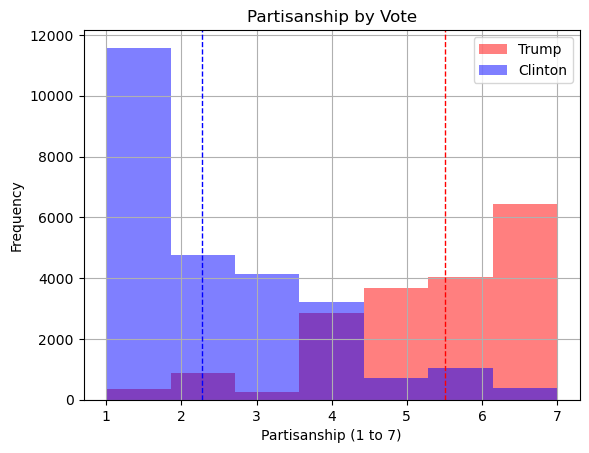

In [13]:
histo_compare(voters_trump, voters_clinton, 'pid7na', 'Partisanship by Vote', nbins=7)

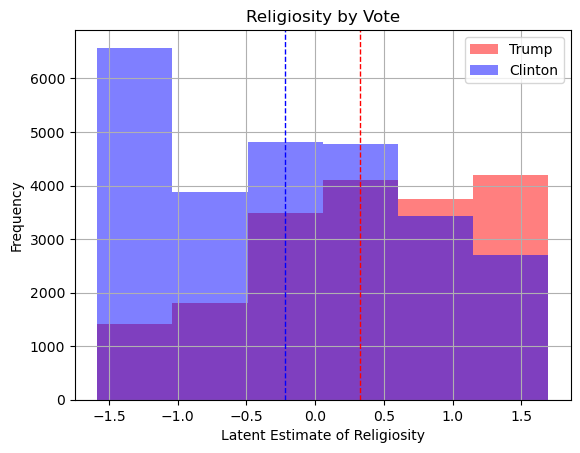

In [14]:
histo_compare(voters_trump, voters_clinton, 'lrelig', 'Religiosity by Vote', nbins=6)

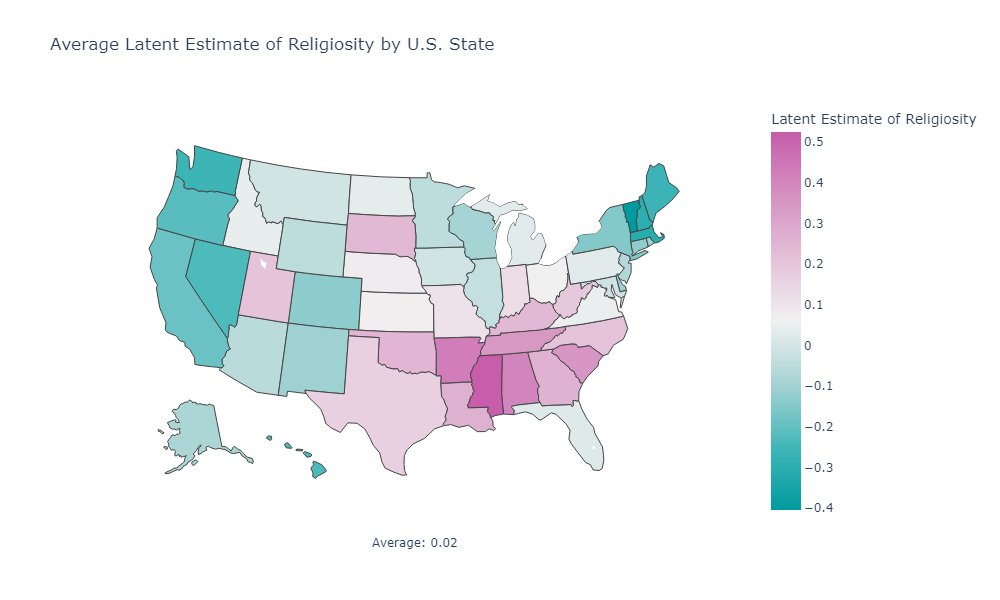

In [15]:
choropleth_vote_data(voter_data, 'lrelig')

# show the png
Image('../img/choropleth_lrelig.png')

Religiosity refers to the quality of being religious or the degree of involvement, commitment, and devotion an individual has toward religious beliefs, practices, and rituals. It encompasses a range of dimensions including doctrinal beliefs, moral codes, religious experiences, and the frequency with which one engages in religious activities like prayer, worship, or reading sacred texts.

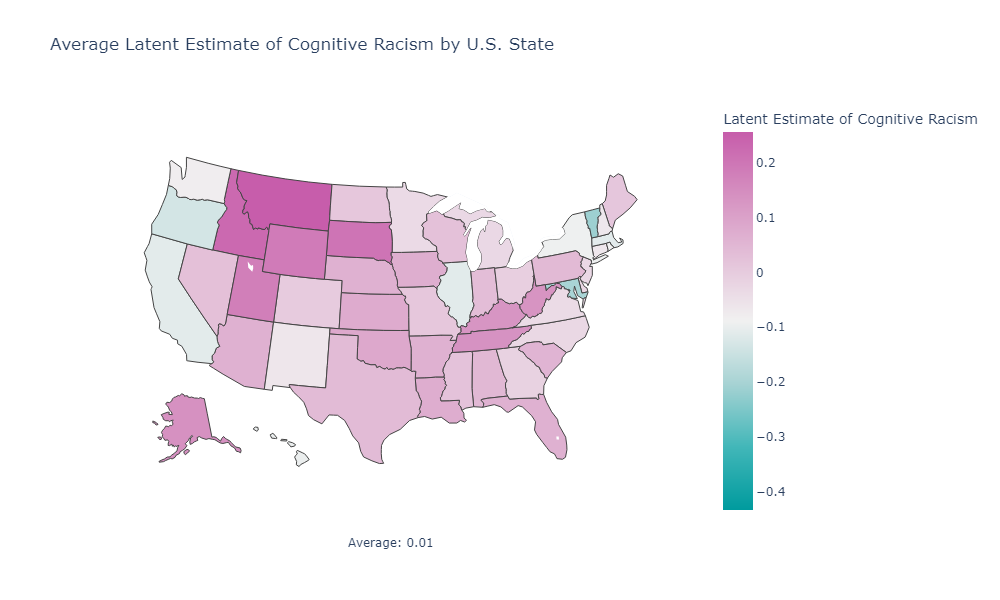

In [16]:
choropleth_vote_data(voter_data, 'lcograc')
Image('../img/choropleth_lcograc.png')

Cognitive racism refers to the manifestation of racist attitudes or beliefs in the cognitive processes or intellectual reasoning of individuals. Unlike overt or explicit forms of racism, which may involve blatant acts of discrimination or hate speech, cognitive racism is often subtle and may not be outwardly expressed. It can be characterized by internalized stereotypes, unconscious biases, and ingrained perceptions that influence how a person thinks about, interprets, or interacts with people from different racial or ethnic groups.

For example, a person might hold an unconscious bias that leads them to perceive individuals of a particular race as more threatening or less competent, even if they do not openly express or act on these beliefs. These cognitive biases can shape various aspects of life, including interpersonal interactions, employment decisions, and law enforcement practices, among other things.

*source - internet*

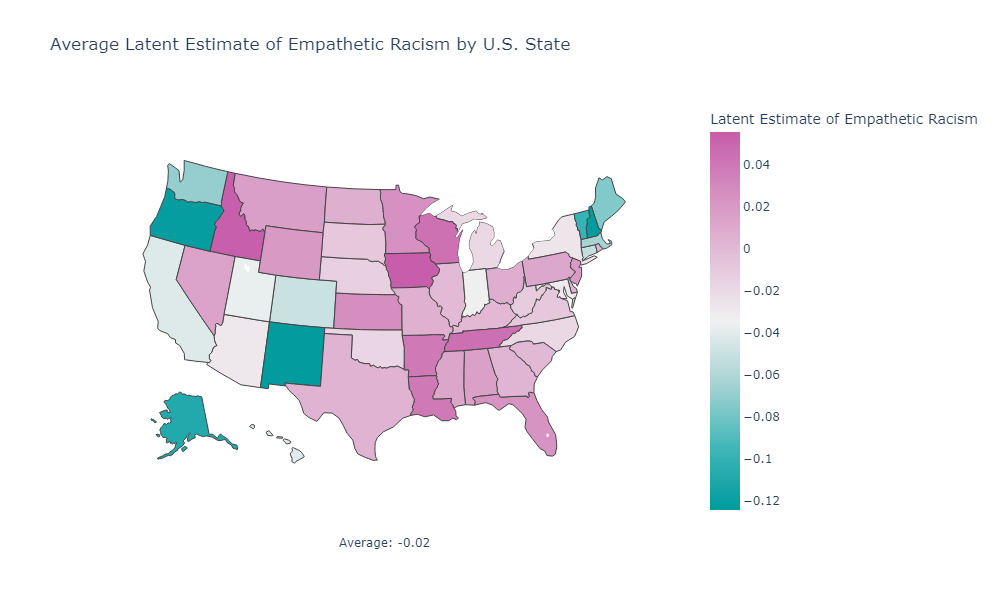

In [17]:
choropleth_vote_data(voter_data, 'lemprac')
Image('../img/choropleth_lemprac.png')

The term "empathetic racism" isn't as commonly used or formally defined as other types of racism, but it generally refers to a situation where someone expresses empathy or kindness toward a person of another race but does so in a way that still perpetuates racial stereotypes or inequalities. Essentially, empathetic racism involves having good intentions but applying them in a way that is ultimately paternalistic, condescending, or perpetuating of racial bias.

For example, if someone helps a person of a different race in a manner that assumes the latter is helpless or incapable due to their racial background, this could be considered empathetic racism. The person offering help may genuinely believe they are doing something positive, but the underlying assumptions about race can still contribute to systemic inequality.

Another example might be when people express sympathy for what they perceive as the "plight" of a racial or ethnic group and take it upon themselves to act as a "savior" without truly understanding the lived experiences or perspectives of those they are trying to help. This can perpetuate a power imbalance and reinforce stereotypes that people of that race or ethnicity are in need of saving, rather than capable of advocating for themselves.

*source - internet*

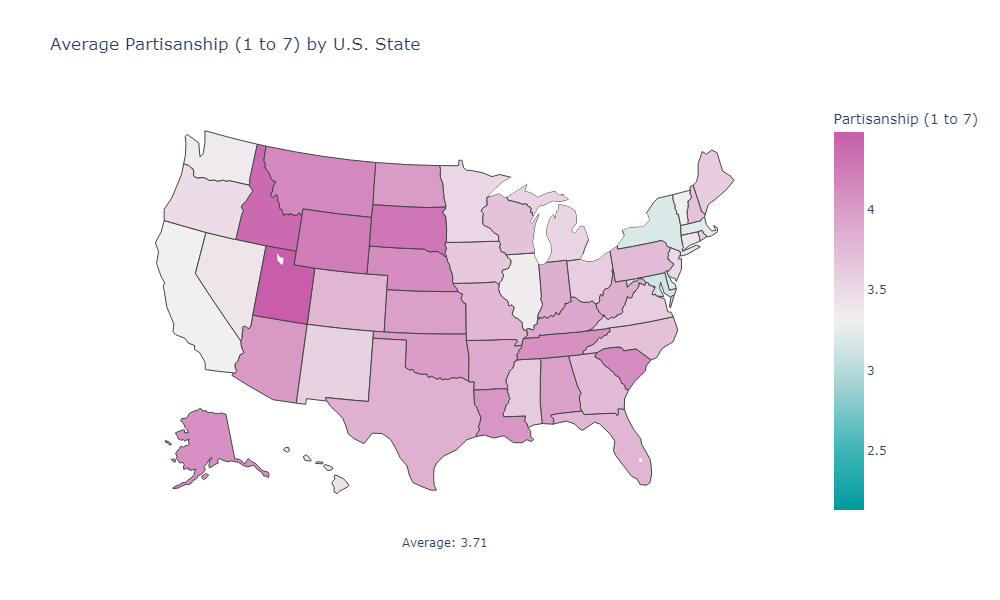

In [18]:
choropleth_vote_data(voter_data, 'pid7na')
Image('../img/choropleth_pid7na.png')

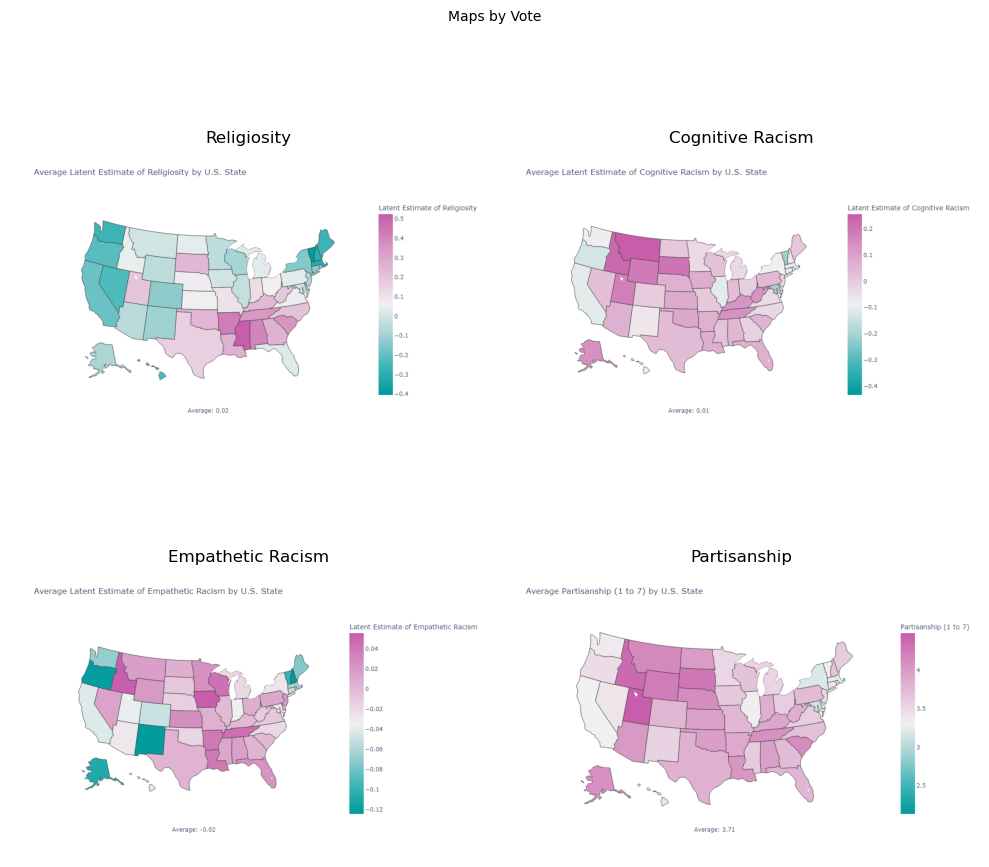

In [19]:
# choropleth image grid
fig = plt.figure(figsize=(10,10))
fig.suptitle('Maps by Vote', fontsize=10)
# row 1
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(plt.imread('../img/choropleth_lrelig.png'))
ax1.axis('off')
ax1.set_title('Religiosity')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(plt.imread('../img/choropleth_lcograc.png'))
ax2.axis('off')
ax2.set_title('Cognitive Racism')
# row 2
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(plt.imread('../img/choropleth_lemprac.png'))
ax3.axis('off')
ax3.set_title('Empathetic Racism')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(plt.imread('../img/choropleth_pid7na.png'))
ax4.axis('off')
ax4.set_title('Partisanship')
plt.tight_layout()
plt.show()

As can be seen above, partisanship in the USA is alive and well.  The division between party ideals played a major role in the 2016 election, and was probably more extreme for 2020, and will be even more extreme by 2024.

In [20]:
for col in ['bornagain', 'religimp', 'churchatd', 'prayerfreq', 'angryracism', 'whiteadv', 'fearraces']:
    choropleth_vote_data(voter_data, col)

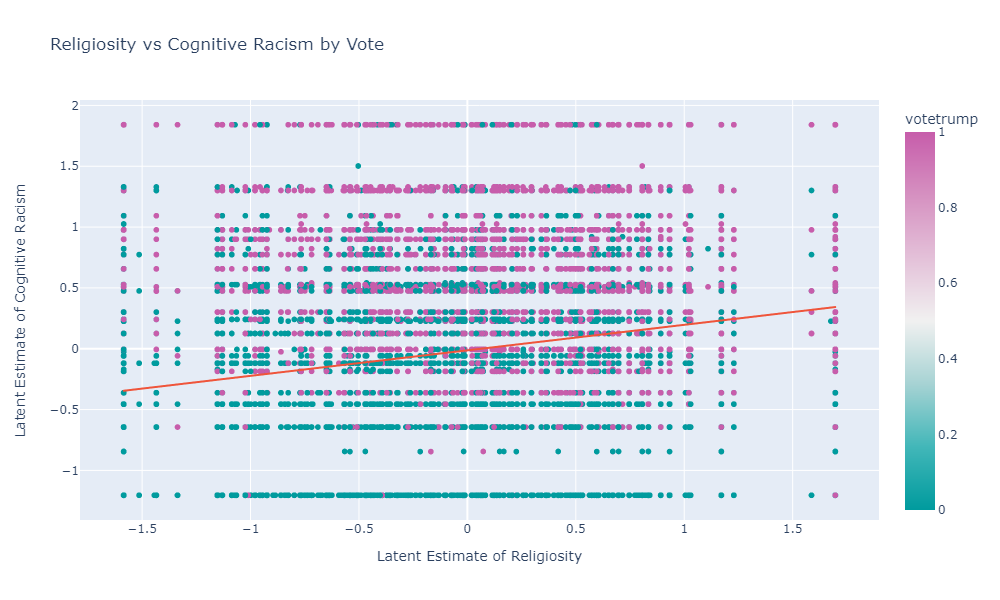

In [21]:
# regression line
fig = px.scatter(voter_data, x='lrelig', y='lcograc', color='votetrump', color_continuous_scale='tropic', trendline='ols', title='Religiosity vs Cognitive Racism by Vote')
fig.update_layout(width=1000, height=600, dragmode=False)
# change x and y titles
fig.update_xaxes(title_text=feature_desc_dict['lrelig'])
fig.update_yaxes(title_text=feature_desc_dict['lcograc'])
# save and show image
fig.write_image('../img/regression_lrelig_lcograc.png')
Image('../img/regression_lrelig_lcograc.png')

The scatterplot above breaks down the correlation beteween Religiosity and Cognitive Racism, with the data points colored by who voted.  The orange trendline shows that cognitive racism scales positively with religiosity.  The density of data point colors make it clear that Trump voters are more likely to be more cognitively racist than Clinton voters, as well as more religious. However, the data also shows that there are Clinton voters who are also cognitively racist and religious, so it is not a perfect correlation.

In [22]:
# random forest classifier to determine feature importance (what contributes to voting for trump)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# drop NaNs
voter_data = voter_data.dropna().reset_index(drop=True)

# split into train and test
X = voter_data.drop(['votetrump', 'state', 'racef', 'state_abbrev'], axis=1)
y = voter_data['votetrump']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# get feature importances
feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances['importance'] = feature_importances['importance'].map(lambda x: '{:.2f}'.format(x))
feature_importances['importance'] = feature_importances['importance'].astype(float)
# rename index based on feature_desc_dict
feature_importances = feature_importances.rename(index=feature_desc_dict)

# accuracy
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy = '{:.3f}'.format(accuracy)
accuracy = float(accuracy) * 100
print('Accuracy: {:.2f}%'.format(accuracy))
feature_importances

Accuracy: 89.20%


,importance
Partisanship (1 to 7),0.31
Ideology (1 lib to 5 con),0.11
Agree Whites have advantages (1 to 5),0.10
Average of Cognitive and Empathetic Racism,0.09
Latent Estimate of Cognitive Racism,0.07
Age at time of vote,0.06
Latent Estimate of Religiosity,0.04
Household Income (1 to 12),0.04
Angry that Racism exists (1 to 5),0.03
Latent Estimate of Empathetic Racism,0.03


A random forest classifier uses an ensemble method of decision trees to classify data.  It is a supervised learning algorithm that can be used for both classification and regression tasks.  I am using it for binary classification to predict whether a voter voted for Trump or Clinton based on the other features.  A chart of the most important features is shown below.

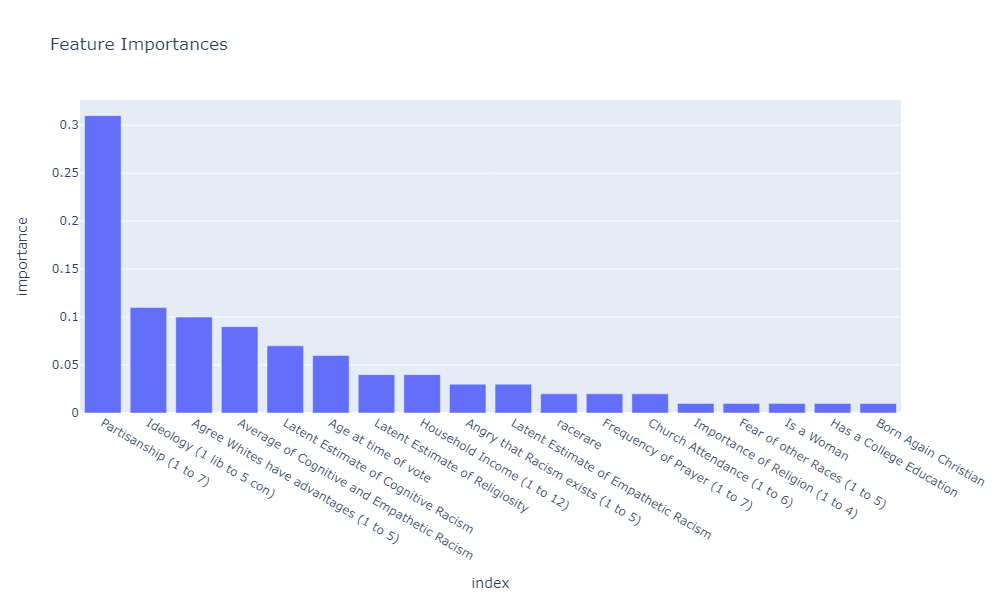

In [23]:
# plot feature importances on bar chart
fig = px.bar(feature_importances, x=feature_importances.index, y='importance', title='Feature Importances')
fig.update_layout(width=1000, height=600, dragmode=False)
# save and show image
fig.write_image('../img/feature_importances.png')
Image('../img/feature_importances.png')